In [1]:
import sklearn
import pandas as pd

In [2]:
sklearn.ensemble??

Object `sklearn.ensemble` not found.


In [3]:
del sklearn

In [4]:
from sklearn import *

In [5]:
ensemble??

Type:        module
String form: <module 'sklearn.ensemble' from 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\ensemble\\__init__.py'>
File:        c:\users\user\appdata\local\programs\python\python311\lib\site-packages\sklearn\ensemble\__init__.py
Source:     
"""
The :mod:`sklearn.ensemble` module includes ensemble-based methods for
classification, regression and anomaly detection.
"""
from ._bagging import BaggingClassifier, BaggingRegressor
from ._base import BaseEnsemble
from ._forest import (
    ExtraTreesClassifier,
    ExtraTreesRegressor,
    RandomForestClassifier,
    RandomForestRegressor,
    RandomTreesEmbedding,
)
from ._gb import GradientBoostingClassifier, GradientBoostingRegressor
from ._hist_gradient_boosting.gradient_boosting import (
    HistGradientBoostingClassifier,
    HistGradientBoostingRegressor,
)
from ._iforest import IsolationForest
from ._stacking import StackingClassifier, StackingRegressor
from ._voting im

In [7]:
## Spaceship - Titanic Data

train = pd.read_csv(r'C:\Users\user\Desktop\ML_Marathon\Data\Datasets\spaceship-titanic\train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\ML_Marathon\Data\Datasets\spaceship-titanic\test.csv')


In [8]:
train = train.fillna({'Cabin': train['Cabin'].ffill(),'Destination': train['Destination'].mode()[0],'Age':train.Age.mean(),'VIP':train.VIP.mode()[0],'RoomService':0,'FoodCourt':0,'ShoppingMall':0,'Spa':0,'VRDeck':0,'HomePlanet':train.HomePlanet.ffill(),'CryoSleep':train.CryoSleep.bfill()})
test = test.fillna({'Cabin': test['Cabin'].ffill(),'Destination': test['Destination'].mode()[0],'Age':test.Age.mean(),'VIP':test.VIP.mode()[0],'RoomService':0,'FoodCourt':0,'ShoppingMall':0,'Spa':0,'VRDeck':0,'HomePlanet':test.HomePlanet.ffill(),'CryoSleep':test.CryoSleep.bfill()})

In [9]:
PassengerId = test.PassengerId

In [10]:
train = train.drop(['Name','PassengerId','Cabin'],axis=1)
test = test.drop(['Name','PassengerId','Cabin'],axis=1)

In [11]:
train = pd.get_dummies(train, columns=['HomePlanet', 'Destination','CryoSleep','VIP'])
test = pd.get_dummies(test, columns=['HomePlanet', 'Destination','CryoSleep','VIP'])

In [17]:
y_train = train.pop('Transported')
X_train = train
X_test = test
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,1,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,1,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,1,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,1,0,1,0


In [6]:
# Let's explore the dataset
import seaborn as sns

<Axes: >

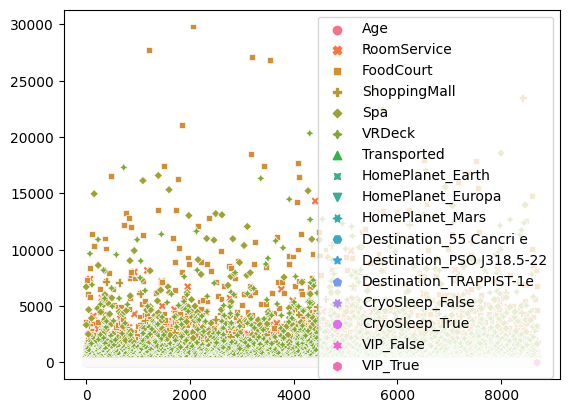

In [12]:
sns.scatterplot(train)

<Axes: xlabel='Age', ylabel='RoomService'>

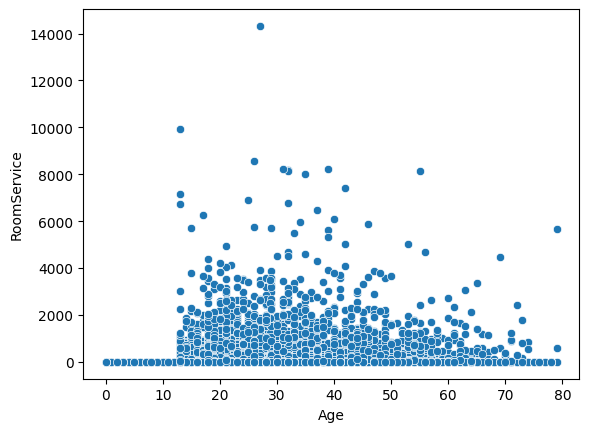

In [15]:
sns.scatterplot(x = train.Age,y=train.RoomService)

In [16]:
# Models
svc = svm.SVC()
ran = ensemble.RandomForestClassifier()
lin_r = linear_model.LogisticRegression()
vot = ensemble.VotingClassifier(estimators=[('lr',lin_r),('rf',ran),('svc',svc)],
                                voting='soft')


In [19]:
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

ran.fit(X_train,y_train)
ran_pred = ran.predict(X_test)

lin_r.fit(X_train,y_train)
linr_pred = lin_r.predict(X_test)



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
linr_pred

array([ True, False,  True, ...,  True,  True,  True])

In [27]:
acc1 = metrics.accuracy_score(linr_pred,svc_pred)
acc2 = metrics.accuracy_score(linr_pred,ran_pred)
acc3 = metrics.accuracy_score(ran_pred,svc_pred)
print(acc1,acc2,acc3)

0.8922141688099134 0.8866027589431845 0.8943184475099368


In [24]:
vot.fit(X_train,y_train)
vot_pred = vot.predict_proba(X_test)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: predict_proba is not available when probability=False

In [26]:
vot.fit??

Signature: vot.fit(X, y, sample_weight=None)
Source:   
    @_fit_context(
        # estimators in VotingClassifier.estimators are not validated yet
        prefer_skip_nested_validation=False
    )
    def fit(self, X, y, sample_weight=None):
        """Fit the estimators.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training vectors, where `n_samples` is the number of samples and
            `n_features` is the number of features.

        y : array-like of shape (n_samples,)
            Target values.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted.
            Note that this is supported only if all underlying estimators
            support sample weights.

            .. versionadded:: 0.18

        Returns
        -------
        self : object
            Returns the instance itself.
        """
        check

In [28]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 3E41-B1A3

 Directory of c:\Users\user\Documents\GitHub\DataScience_ML_journey

01/02/2024  12:40    <DIR>          .
01/02/2024  12:40    <DIR>          ..
31/01/2024  17:10                66 .gitattributes
01/02/2024  12:20    <DIR>          DecisionTrees
01/02/2024  12:13    <DIR>          images
01/02/2024  12:40    <DIR>          RandomForests
01/02/2024  12:25               432 README.md
31/01/2024  19:17            62,166 third_rev_xgb.csv
               3 File(s)         62,664 bytes
               5 Dir(s)   2,102,108,160 bytes free


In [29]:
third_rev_xgb = pd.read_csv('third_rev_xgb.csv')
print(metrics.accuracy_score(ran_pred,third_rev_xgb.Transported),metrics.accuracy_score(svc_pred,third_rev_xgb.Transported),metrics.accuracy_score(linr_pred,third_rev_xgb.Transported))

0.8622866495206921 0.8688332943652093 0.8980593874210896


In [30]:
lin_r_data = {
    'PassengerId':PassengerId,
    'Transported':linr_pred
}
svc_data = {
    'PassengerId':PassengerId,
    'Transported':svc_pred
}
ran_data = {
    'PassengerId':PassengerId,
    'Transported':ran_pred
}
logr = pd.DataFrame(lin_r_data)
sv_ = pd.DataFrame(svc_data)
ranFor = pd.DataFrame(ran_data)


In [34]:
ranFor.to_csv('spacetitanic_ranfor.csv',index=None)
sv_.to_csv('spacetitanic_sv_.csv',index=None)
logr.to_csv('spaceshiptitanic_logreg.csv',index=None)